# RANDOM FOREST 


In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt

In [2]:
data = pd.read_excel(r'C:\Users\DataMicron\Desktop\Work\Penjara\Banduan_v2.xlsx')
data.head()

,tarikh_masuk,id_banduan,jantina,negeri,umur,bangsa,kategori_hukuman,banduan_berulang_kali,kesalahan,tempoh_hukuman,penyakit,rawatan,program_pemulihan,id_penjara,status,tarikh_status
0,2020-01-26,PK718,Perempuan,Selangor,57,India,Seumur Hidup,Tidak,Pengedar Dadah,5,Skizofrenia,NaN,PPI 1,PSG,NaN,NaT
1,2022-12-25,PSG768,Perempuan,Penang,39,Lain-lain,Banduan Akhir,Tidak,Jenayah Bunuh,14,Skizofrenia,NaN,Kesedaran dan Pemulihan,PSG,NaN,NaT
2,2020-11-10,PK824,Lelaki,Johor,51,India,Seumur Hayat,Tidak,Pencurian,1,NaN,Terapi Fizikal,PPI 2,PK,NaN,NaT
3,2021-01-06,PK559,Lelaki,Johor,59,India,Hukuman Singkat,Tidak,Pencurian,5,NaN,NaN,Kesedaran dan Pemulihan,PSG,Meninggal,2023-01-06
4,2021-10-05,PSG155,Lelaki,Pahang,54,Lain-lain,Orang Diparol,Tidak,Jenayah Seksual,19,NaN,NaN,Parol,PK,NaN,NaT


In [3]:
# Preprocessing: Convert target variable 'banduan_berulang_kali' to binary
data['banduan_berulang_kali'] = data['banduan_berulang_kali'].map({'Tidak': 0, 'Ya': 1})

# Drop rows with NaN in the target variable
data = data.dropna(subset=['banduan_berulang_kali'])

# Encoding categorical variables (One-Hot Encoding)
data_encoded = pd.get_dummies(data.drop(['id_banduan', 'tarikh_masuk', 'tarikh_status', 'status'], axis=1))

# Splitting the dataset into features (X) and target variable (y)
X = data_encoded.drop('banduan_berulang_kali', axis=1)
y = data_encoded['banduan_berulang_kali']

In [4]:
# Splitting data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Training the Random Forest Classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Extracting feature importances
feature_importances = rf.feature_importances_

# Sort the feature importances in descending order
sorted_indices = np.argsort(feature_importances)[::-1]
sorted_feature_names = X.columns[sorted_indices]

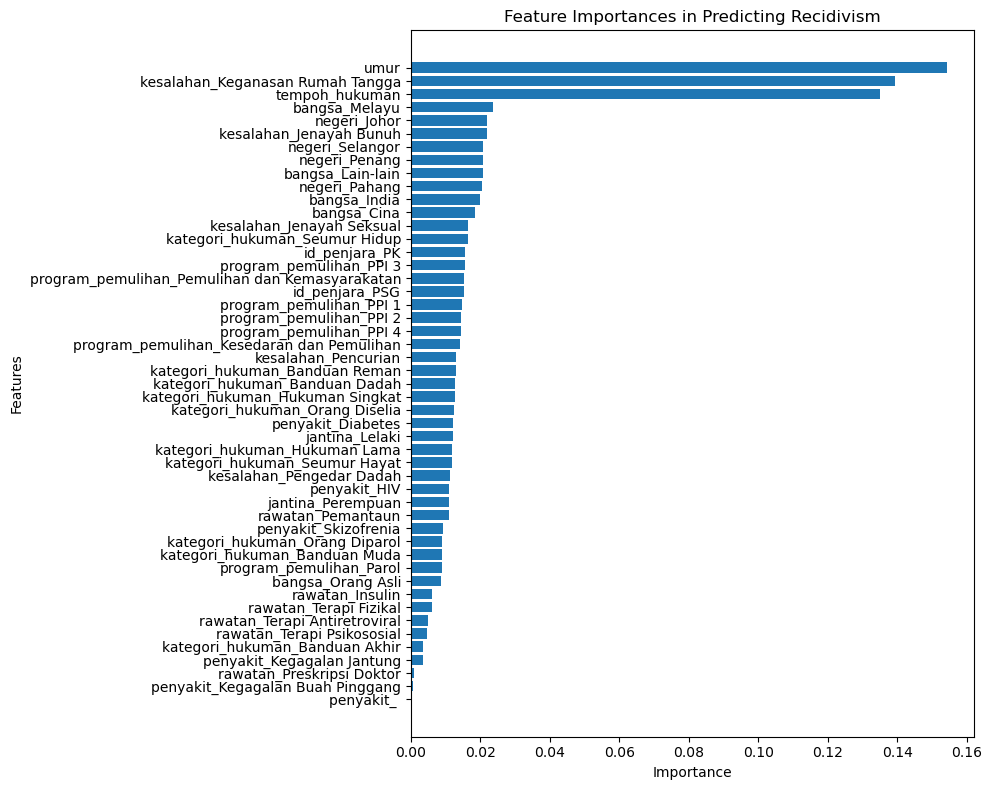

In [5]:
# Create a bar chart for the sorted feature importances
plt.figure(figsize=(10, 8))
plt.title('Feature Importances in Predicting Recidivism')
plt.barh(range(X.shape[1]), feature_importances[sorted_indices], align='center')
plt.yticks(range(X.shape[1]), sorted_feature_names)
plt.gca().invert_yaxis()  
plt.xlabel('Importance')
plt.ylabel('Features')
plt.tight_layout()  
plt.show()

# XGBoost

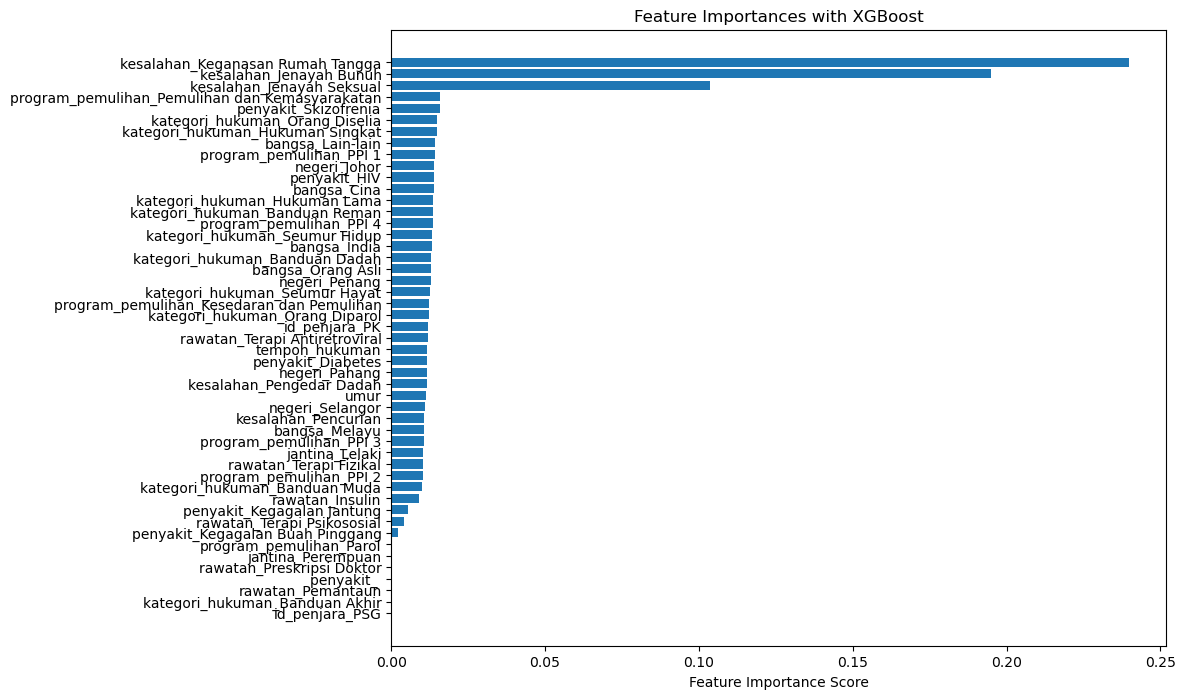

In [10]:
import xgboost as xgb
import matplotlib.pyplot as plt
import numpy as np

# Initialize XGBoost classifier
xg_clf = xgb.XGBClassifier(objective='binary:logistic', seed=42, use_label_encoder=False, eval_metric='logloss')

# Fit the classifier to the training set
xg_clf.fit(X_train, y_train)

# Get feature importances and sort them
feature_importances = xg_clf.feature_importances_
sorted_idx = np.argsort(feature_importances)[::-1]
sorted_feature_names = X_train.columns[sorted_idx]

# Plot the sorted feature importances in a horizontal bar chart
plt.figure(figsize=(10, 8))
plt.title('Feature Importances with XGBoost')
plt.barh(sorted_feature_names, feature_importances[sorted_idx])
plt.xlabel('Feature Importance Score')
plt.gca().invert_yaxis()  
plt.show()

# LightGBM

In [11]:
import lightgbm as lgb
import matplotlib.pyplot as plt
import numpy as np

# Initialize LGBM classifier
lgb_clf = lgb.LGBMClassifier(random_state=42)

# Fit the classifier to the training set
lgb_clf.fit(X_train, y_train)

# Get feature importances and sort them
lgb_feature_importances = lgb_clf.feature_importances_
sorted_idx = np.argsort(lgb_feature_importances)[::-1]
sorted_feature_names = X_train.columns[sorted_idx]

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 1189, number of negative: 8261
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000505 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 157
[LightGBM] [Info] Number of data points in the train set: 9450, number of used features: 48
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.125820 -> initscore=-1.938433
[LightGBM] [Info] Start training from score -1.938433


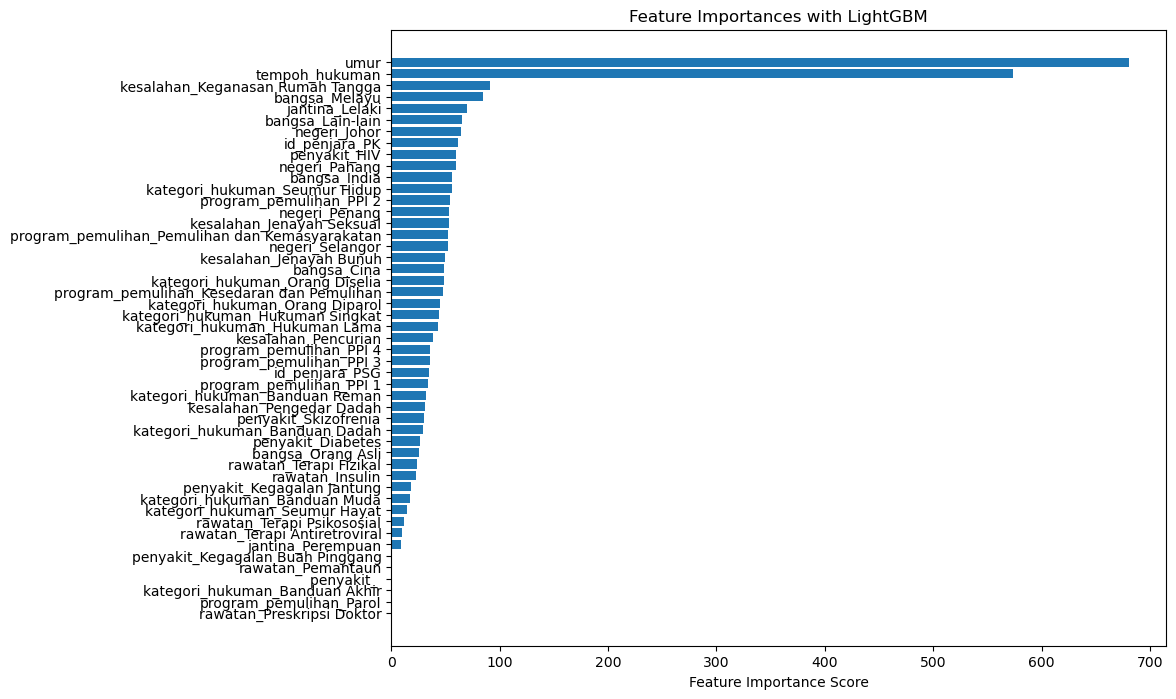

In [12]:
# Plot the sorted feature importances in a horizontal bar chart
plt.figure(figsize=(10, 8))
plt.title('Feature Importances with LightGBM')
plt.barh(sorted_feature_names, lgb_feature_importances[sorted_idx])
plt.xlabel('Feature Importance Score')
plt.gca().invert_yaxis()  
plt.show()

# ADA Boost

In [14]:
from sklearn.ensemble import AdaBoostClassifier
import matplotlib.pyplot as plt
import numpy as np

# Initialize AdaBoost classifier
ada_clf = AdaBoostClassifier(random_state=42)

# Fit the classifier to the training set
ada_clf.fit(X_train, y_train)

# Extract feature importances
ada_feature_importances = ada_clf.feature_importances_

# Sort the feature importances in descending order
sorted_idx = np.argsort(ada_feature_importances)[::-1]
sorted_feature_names = [sorted_feature_names[i] for i in sorted_idx]

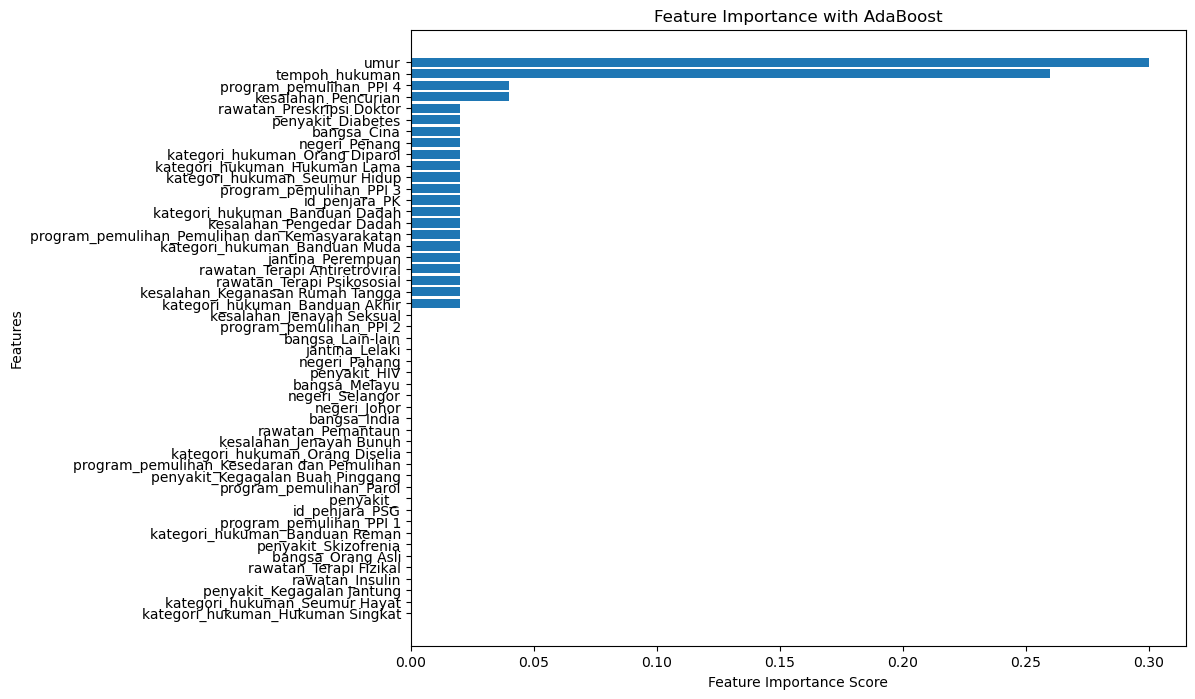

In [15]:
# Plotting graph
plt.figure(figsize=(10,8))
plt.barh(sorted_feature_names, ada_feature_importances[sorted_idx])
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title('Feature Importance with AdaBoost')
plt.gca().invert_yaxis()  # To display the highest importance at the top
plt.show()


# Classifier Accuracy


In [16]:
from sklearn.metrics import accuracy_score

# Random Forest
rf_predictions = rf.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_predictions)

# XGBoost
xg_predictions = xg_clf.predict(X_test)
xg_accuracy = accuracy_score(y_test, xg_predictions)

# LightGBM
lgb_predictions = lgb_clf.predict(X_test)
lgb_accuracy = accuracy_score(y_test, lgb_predictions)

# AdaBoost
ada_predictions = ada_clf.predict(X_test)
ada_accuracy = accuracy_score(y_test, ada_predictions)

# Print the accuracies
print(f'Random Forest Accuracy: {rf_accuracy:.2f}')
print(f'XGBoost Accuracy: {xg_accuracy:.2f}')
print(f'LightGBM Accuracy: {lgb_accuracy:.2f}')
print(f'AdaBoost Accuracy: {ada_accuracy:.2f}')


Random Forest Accuracy: 0.85
XGBoost Accuracy: 0.85
LightGBM Accuracy: 0.86
AdaBoost Accuracy: 0.86
